# Merging the Perspectives and Classification of Outliers

In [ ]:
pip install collection
pip install os.path
pip install matplotlib
pip install seaborn
pip install numpy
pip install pandas
pip install sklearn 
pip install scipy
pip install graphviz

In [40]:
from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import graphviz

sns.set()

In [ ]:
### Importing the dataset (already pre-processed)

In [44]:
#Importing the dataset with the encoded categorical variables
df=pd.read_csv('pva_i_ohe_out.csv', sep=';')

In [41]:
#Importing the demographic variables and the label of each observation, from the optimal clusterer method  SOM + Hierarchical clustering
DEMO=pd.read_csv('Demo(HC+SOM).csv', sep=';')
DEMO=DEMO.drop('BMU',axis=1)
DEMO

,Age,GENDER_F,GENDER_M,GENDER_U,INCOME,NUMCHLD,label
0,0.039357,1.0,0.0,0.0,-0.265780,-0.336116,2
1,0.061957,0.0,1.0,0.0,-0.477775,-0.336116,1
2,0.637259,1.0,0.0,0.0,-1.555973,-0.336116,0
3,-0.240152,0.0,0.0,1.0,-0.051029,-0.336116,1
4,-1.276027,1.0,0.0,0.0,0.061324,1.358619,3
...,...,...,...,...,...,...,...
85865,-0.183048,0.0,1.0,0.0,-0.017895,-0.336116,1
85866,-0.678125,0.0,1.0,0.0,1.678621,1.358619,3
85867,0.039357,0.0,1.0,0.0,-0.357898,-0.336116,1
85868,-0.140014,1.0,0.0,0.0,1.678621,-0.336116,2


In [49]:
#Importing the demographic variables and the label of each observation, from the optimal clusterer method  GMM
NGB=pd.read_csv('NGB(Kmeans+SOM).csv', sep=';')
NGB=NGB.drop('BMU',axis=1)
NGB

,POP90C1,POP90C4,POP90C5,ETH1,ETH2,ETH5,ETH6,AGE901,HHD2,IC1,...,TPE1,EC5,AFC1,HC20,HV1,LFC1,OCC1,EC1,POBC1,label
0,-1.235273,-0.217719,0.355148,0.340039,-0.387486,0.256922,-0.318003,0.542821,0.561293,-0.202946,...,0.895769,0.029293,-0.188230,0.149432,-0.618881,-0.627254,-0.622342,-0.452344,-0.375798,1
1,-1.235273,0.141635,0.008427,0.530390,-0.327572,-0.395915,-0.318003,0.062950,0.297034,-0.546753,...,-0.157687,-0.672629,-0.188230,-0.058338,-0.599768,0.034437,-0.500856,-0.452344,-0.479467,1
2,-1.235273,1.040019,-0.858375,-1.135185,-0.447400,1.780208,8.514990,-0.296953,0.098839,0.282066,...,-1.361637,0.871600,-0.188230,-0.473879,-0.065662,0.328522,0.349543,-0.452344,2.319580,0
3,0.472488,0.141635,0.008427,0.387627,-0.087918,-0.468452,-0.318003,-0.296953,0.363098,0.146999,...,0.820522,-0.251476,-0.188230,0.149432,-0.270598,0.181480,0.592514,-0.452344,-0.583135,2
4,-1.235273,-0.397395,0.528508,0.673154,-0.447400,-0.468452,-0.318003,0.062950,-0.099355,-0.546753,...,0.820522,-0.532245,0.127285,0.149432,-0.613572,-0.774297,-0.986798,-0.452344,-0.686804,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85865,0.851990,0.321312,-0.164933,-0.326191,0.151737,-0.178303,-0.318003,-0.776824,0.032775,0.570618,...,-0.007193,1.713907,2.335888,0.149432,-0.078404,1.210778,0.106572,0.449803,-0.272130,2
85866,0.788740,0.500988,-0.338294,0.292451,-0.267659,-0.105765,1.154162,-0.536889,1.155875,2.860613,...,0.293794,0.450447,-0.188230,0.149432,0.655327,0.622607,0.471028,1.803022,-0.479467,0
85867,0.851990,0.860342,-0.685014,-0.135840,0.391392,0.111847,-0.318003,-0.776824,-0.495743,-0.473080,...,0.519535,0.310062,-0.188230,0.149432,-0.728251,0.328522,-1.108284,-0.452344,-0.064793,2
85868,0.851990,-0.217719,0.355148,0.340039,-0.387486,0.039310,-0.318003,-0.057018,0.891616,1.301206,...,0.293794,1.994676,-0.188230,0.149432,1.443213,0.622607,-0.014914,0.675339,0.764554,0


In [51]:
# The dataframe with the varibles from both perspectives along with the respective labels 'NGB_label', 'DEMO_label'
df=df[['POP90C1','POP90C4','POP90C5','ETH1','ETH2','ETH5','ETH6','AGE901', 'HHD2','IC1',   'HHAS3','TPE1','EC5', 'AFC1',
'HC20','HV1','LFC1','OCC1','EC1','POBC1','Age','GENDER_F','GENDER_M','GENDER_U','INCOME','NUMCHLD']]
df['NGB_label']=NGB[['label']]
df['DEMO_label']=DEMO[['label']]
df

,POP90C1,POP90C4,POP90C5,ETH1,ETH2,ETH5,ETH6,AGE901,HHD2,IC1,...,EC1,POBC1,Age,GENDER_F,GENDER_M,GENDER_U,INCOME,NUMCHLD,NGB_label,DEMO_label
0,-1.235273,-0.217719,0.355148,0.340039,-0.387486,0.256922,-0.318003,0.542821,0.561293,-0.202946,...,-0.452344,-0.375798,0.039357,1,0,0,-0.265780,-0.336116,1,2
1,-1.235273,0.141635,0.008427,0.530390,-0.327572,-0.395915,-0.318003,0.062950,0.297034,-0.546753,...,-0.452344,-0.479467,0.061957,0,1,0,-0.477775,-0.336116,1,1
2,-1.235273,1.040019,-0.858375,-1.135185,-0.447400,1.780208,8.514990,-0.296953,0.098839,0.282066,...,-0.452344,2.319580,0.637259,1,0,0,-1.555973,-0.336116,0,0
3,0.472488,0.141635,0.008427,0.387627,-0.087918,-0.468452,-0.318003,-0.296953,0.363098,0.146999,...,-0.452344,-0.583135,-0.240152,0,0,1,-0.051029,-0.336116,2,1
4,-1.235273,-0.397395,0.528508,0.673154,-0.447400,-0.468452,-0.318003,0.062950,-0.099355,-0.546753,...,-0.452344,-0.686804,-1.276027,1,0,0,0.061324,1.358619,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85865,0.851990,0.321312,-0.164933,-0.326191,0.151737,-0.178303,-0.318003,-0.776824,0.032775,0.570618,...,0.449803,-0.272130,-0.183048,0,1,0,-0.017895,-0.336116,2,1
85866,0.788740,0.500988,-0.338294,0.292451,-0.267659,-0.105765,1.154162,-0.536889,1.155875,2.860613,...,1.803022,-0.479467,-0.678125,0,1,0,1.678621,1.358619,0,3
85867,0.851990,0.860342,-0.685014,-0.135840,0.391392,0.111847,-0.318003,-0.776824,-0.495743,-0.473080,...,-0.452344,-0.064793,0.039357,0,1,0,-0.357898,-0.336116,2,1
85868,0.851990,-0.217719,0.355148,0.340039,-0.387486,0.039310,-0.318003,-0.057018,0.891616,1.301206,...,0.675339,0.764554,-0.140014,1,0,0,1.678621,-0.336116,0,2


# Merging using Hierarchical clustering

In [52]:
# Count label frequencies (contigency table)
df.groupby(['NGB_label', 'DEMO_label'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('NGB_label', 'DEMO_label', 0)

DEMO_label,0,1,2,3
NGB_label,,,,
0,2806,6503,7641,2604
1,11449,7191,8120,3413
2,9233,6821,7745,3494
3,3122,2063,2522,1143


In [53]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['NGB_label', 'DEMO_label'])\
    [df.columns].mean()
df_centroids

POP90C1   POP90C4   POP90C5      ETH1      ETH2  \
NGB_label DEMO_label                                                     
0         0           0.677184  0.022982  0.123218  0.202363 -0.258947   
          1           0.647222  0.135556  0.014399  0.195219 -0.283183   
          2           0.666193  0.125057  0.024490  0.168658 -0.268309   
          3           0.589653  0.193661 -0.041704  0.218785 -0.269821   
1         0          -1.194775  0.102464  0.046327  0.413048 -0.228766   
          1          -1.189902  0.187110 -0.035377  0.372373 -0.173610   
          2          -1.195420  0.174163 -0.022829  0.358529 -0.161290   
          3          -1.189634  0.176380 -0.025046  0.394933 -0.178481   
2         0           0.739110 -0.145813  0.285864  0.272829 -0.152322   
          1           0.646488  0.032396  0.113978  0.242568 -0.128586   
          2           0.657930  0.012764  0.132857  0.219985 -0.108325   
          3           0.668979  0.068355  0.079280  0.237754 -0.104534   
3         0           0.194209 -0.018935  0.163463 -1.633241  1.459820   
          1           0.235020  0.103749  0.045066 -1.452522  1.038970   
          2           0.288940  0.048092  0.098750 -1.629800  1.363148   
          3           0.315976  0.022479  0.123394 -1.730720  1.542332   

                          ETH5      ETH6    AGE901      HHD2       IC1  ...  \
NGB_label DEMO_label                                                    ...   
0         0          -0.059311  0.602756  0.221952 -0.009746  0.722436  ...   
          1          -0.074689  0.608354  0.163160  0.288652  1.163885  ...   
          2          -0.063407  0.624136  0.136491  0.248201  1.169966  ...   
          3          -0.097659  0.708668 -0.026335  0.554874  1.160354  ...   
1         0          -0.366847 -0.292029  0.165911  0.129515 -0.568025  ...   
          1          -0.362314 -0.283200  0.001840  0.289335 -0.376105  ...   
          2          -0.366748 -0.286276  0.006482  0.266458 -0.415393  ...   
          3          -0.375682 -0.288241 -0.090938  0.326398 -0.340799  ...   
2         0          -0.170093 -0.177691  0.175784 -0.345081 -0.296521  ...   
          1          -0.155151 -0.142319 -0.046957 -0.057329  0.009655  ...   
          2          -0.145148 -0.145601 -0.097616 -0.124740 -0.018557  ...   
          3          -0.166116 -0.162107 -0.213072  0.121227 -0.008942  ...   
3         0           1.590662 -0.141174 -0.553643  0.100321 -0.667773  ...   
          1           1.844131 -0.069669 -0.547647  0.216943 -0.407856  ...   
          2           1.627252 -0.095602 -0.560863  0.198277 -0.424064  ...   
          3           1.626819 -0.163445 -0.629357  0.348533 -0.446782  ...   

                           EC1     POBC1       Age  GENDER_F  GENDER_M  \
NGB_label DEMO_label                                                     
0         0           0.875356  0.273773  0.713707  0.579116  0.318959   
          1           1.001089  0.312035 -0.069813  0.000000  0.942334   
          2           1.009423  0.358862 -0.172134  0.950530  0.000000   
          3           0.923048  0.172123 -0.597665  0.549539  0.428955   
1         0          -0.387922 -0.504721  0.559260  0.527033  0.378810   
          1          -0.357382 -0.496449 -0.212343  0.000000  0.955083   
          2          -0.357706 -0.506890 -0.253015  0.990517  0.000000   
          3          -0.368750 -0.522781 -0.606350  0.558160  0.424260   
2         0          -0.151687 -0.170573  0.663673  0.583992  0.330987   
          1           0.009649 -0.148841 -0.217692  0.000000  0.939452   
          2           0.015539 -0.153551 -0.325344  0.988380  0.000000   
          3          -0.084346 -0.236882 -0.539301  0.577848  0.407842   
3         0          -0.511094  0.766513  0.560729  0.581999  0.316464   
          1          -0.418398  1.187268 -0.259775  0.000000  0.938924   
          2          -0.401303  1.001692 -0.289232  0.990087  0.000000   
         

In [54]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels  = hclust.fit_predict(df_centroids)

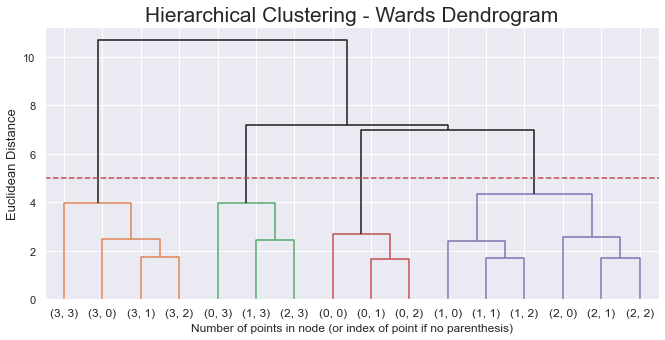

In [55]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))

y_threshold = 5
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - Wards Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [56]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids=df_centroids.drop('DEMO_label',axis=1)
df_centroids=df_centroids.drop('NGB_label',axis=1)# centroid's cluster labels
df_centroids

POP90C1   POP90C4   POP90C5      ETH1      ETH2  \
NGB_label DEMO_label                                                     
0         0           0.677184  0.022982  0.123218  0.202363 -0.258947   
          1           0.647222  0.135556  0.014399  0.195219 -0.283183   
          2           0.666193  0.125057  0.024490  0.168658 -0.268309   
          3           0.589653  0.193661 -0.041704  0.218785 -0.269821   
1         0          -1.194775  0.102464  0.046327  0.413048 -0.228766   
          1          -1.189902  0.187110 -0.035377  0.372373 -0.173610   
          2          -1.195420  0.174163 -0.022829  0.358529 -0.161290   
          3          -1.189634  0.176380 -0.025046  0.394933 -0.178481   
2         0           0.739110 -0.145813  0.285864  0.272829 -0.152322   
          1           0.646488  0.032396  0.113978  0.242568 -0.128586   
          2           0.657930  0.012764  0.132857  0.219985 -0.108325   
          3           0.668979  0.068355  0.079280  0.237754 -0.104534   
3         0           0.194209 -0.018935  0.163463 -1.633241  1.459820   
          1           0.235020  0.103749  0.045066 -1.452522  1.038970   
          2           0.288940  0.048092  0.098750 -1.629800  1.363148   
          3           0.315976  0.022479  0.123394 -1.730720  1.542332   

                          ETH5      ETH6    AGE901      HHD2       IC1  ...  \
NGB_label DEMO_label                                                    ...   
0         0          -0.059311  0.602756  0.221952 -0.009746  0.722436  ...   
          1          -0.074689  0.608354  0.163160  0.288652  1.163885  ...   
          2          -0.063407  0.624136  0.136491  0.248201  1.169966  ...   
          3          -0.097659  0.708668 -0.026335  0.554874  1.160354  ...   
1         0          -0.366847 -0.292029  0.165911  0.129515 -0.568025  ...   
          1          -0.362314 -0.283200  0.001840  0.289335 -0.376105  ...   
          2          -0.366748 -0.286276  0.006482  0.266458 -0.415393  ...   
          3          -0.375682 -0.288241 -0.090938  0.326398 -0.340799  ...   
2         0          -0.170093 -0.177691  0.175784 -0.345081 -0.296521  ...   
          1          -0.155151 -0.142319 -0.046957 -0.057329  0.009655  ...   
          2          -0.145148 -0.145601 -0.097616 -0.124740 -0.018557  ...   
          3          -0.166116 -0.162107 -0.213072  0.121227 -0.008942  ...   
3         0           1.590662 -0.141174 -0.553643  0.100321 -0.667773  ...   
          1           1.844131 -0.069669 -0.547647  0.216943 -0.407856  ...   
          2           1.627252 -0.095602 -0.560863  0.198277 -0.424064  ...   
          3           1.626819 -0.163445 -0.629357  0.348533 -0.446782  ...   

                          OCC1       EC1     POBC1       Age  GENDER_F  \
NGB_label DEMO_label                                                     
0         0           1.020051  0.875356  0.273773  0.713707  0.579116   
          1           0.991942  1.001089  0.312035 -0.069813  0.000000   
          2           0.995606  1.009423  0.358862 -0.172134  0.950530   
          3           0.866510  0.923048  0.172123 -0.597665  0.549539   
1         0          -0.410365 -0.387922 -0.504721  0.559260  0.527033   
          1          -0.374015 -0.357382 -0.496449 -0.212343  0.000000   
          2          -0.387689 -0.357706 -0.506890 -0.253015  0.990517   
          3          -0.385600 -0.368750 -0.522781 -0.606350  0.558160   
2         0          -0.228030 -0.151687 -0.170573  0.663673  0.583992   
          1          -0.087937  0.009649 -0.148841 -0.217692  0.000000   
          2          -0.089515  0.015539 -0.153551 -0.325344  0.988380   
          3          -0.195995 -0.084346 -0.236882 -0.539301  0.577848   
3         0          -0.619151 -0.511094  0.766513  0.560729  0.581999   
          1          -0.494967 -0.418398  1.187268 -0.259775  0.000000   
          2          -0.496184 -0.401303  1.001692 -0.289232  0.990087   
         

In [57]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['DEMO_label'], row['NGB_label'])
    ], axis=1
)

# Merged cluster centroids
cluster_centroids=df_.groupby('merged_labels').mean()[df.columns].drop('DEMO_label',axis=1)
cluster_centroids=cluster_centroids.drop('NGB_label',axis=1)

In [58]:
cluster_centroids

,POP90C1,POP90C4,POP90C5,ETH1,ETH2,ETH5,ETH6,AGE901,HHD2,IC1,...,LFC1,OCC1,EC1,POBC1,Age,GENDER_F,GENDER_M,GENDER_U,INCOME,NUMCHLD
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,0.012295,0.111688,0.037424,0.261365,-0.185499,-0.198452,0.051468,0.024840,0.151307,0.235183,...,0.213582,0.157364,0.202966,-0.116290,-0.212521,0.521592,0.440790,0.037618,0.415289,-0.334807
1,0.016314,0.128666,0.021022,0.072285,0.008060,-0.024166,0.010173,-0.172966,0.317329,0.123568,...,0.270286,-0.031642,0.033008,-0.118914,-0.569843,0.570115,0.412240,0.017646,0.339597,2.235096
2,0.236133,0.035838,0.110594,-1.583741,1.315533,1.670484,-0.107121,-0.554401,0.163593,-0.518449,...,-0.072930,-0.545670,-0.450354,0.956099,0.062960,0.559751,0.379525,0.060724,-0.275961,-0.326220
3,-0.210941,-0.004628,0.149674,0.332759,-0.202322,-0.252764,-0.140188,0.176487,-0.073683,-0.307133,...,-0.138501,-0.167805,-0.144142,-0.280366,0.618755,0.555645,0.352861,0.091494,-0.852323,-0.323994


In [59]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['NGB_label'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['DEMO_label'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('DEMO_label', 'NGB_label', 0)

hclust_labels = hclust.fit_predict(df_centroids)

In [60]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()

# Cluster Analysis

In [61]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

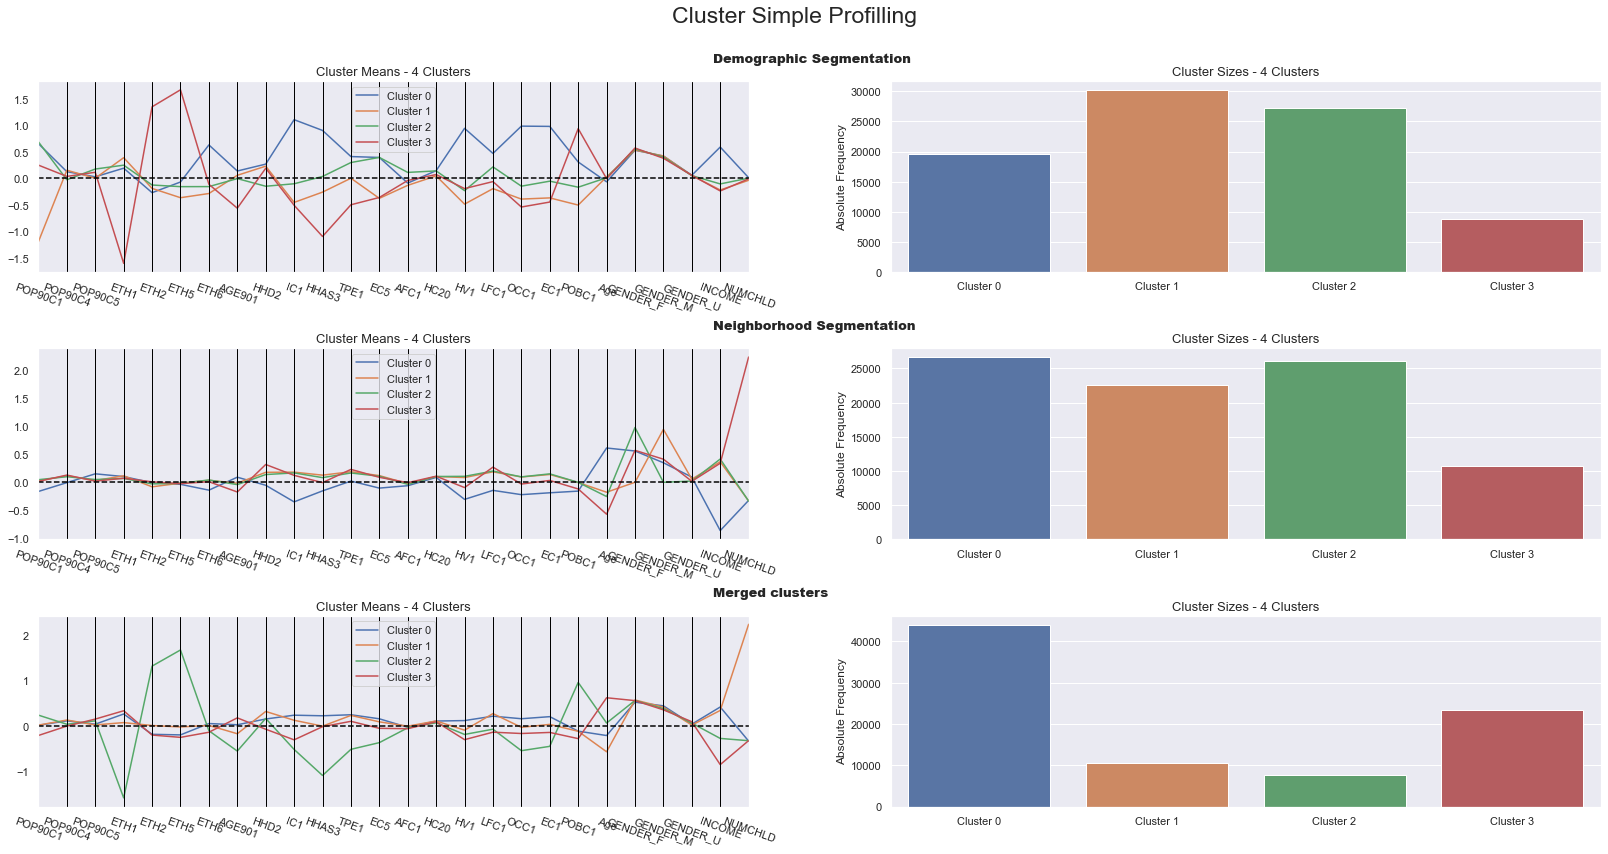

In [62]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[df.loc[:,'POP90C1':'NUMCHLD'].columns.to_list() + ['NGB_label', 'DEMO_label', 'merged_labels']],
    label_columns = ['NGB_label', 'DEMO_label', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic Segmentation", "Neighborhood Segmentation", "Merged clusters"]
)

# Feature importance

### USING r^2

In [63]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [64]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df[df.loc[:,'POP90C1':'NUMCHLD'].columns.to_list() + ['merged_labels']], 'merged_labels').drop('merged_labels')

POP90C1     0.016385
POP90C4     0.012869
POP90C5     0.012874
ETH1        0.391341
ETH2        0.212887
ETH5        0.323250
ETH6        0.008220
AGE901      0.064659
HHD2        0.025986
IC1         0.103661
HHAS3       0.156805
TPE1        0.097587
EC5         0.028203
AFC1        0.000896
HC20        0.004952
HV1         0.042366
LFC1        0.046251
OCC1        0.054816
EC1         0.087300
POBC1       0.138196
Age         0.223031
GENDER_F    0.001562
GENDER_M    0.006037
GENDER_U    0.013927
INCOME      0.382103
NUMCHLD     0.754437
dtype: float64

# Decision Tree classifier

In [65]:
# Preparing the data
X = df.drop(columns=['NGB_label','DEMO_label','merged_labels'])
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 82.17% of the customers correctly


In [66]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

POP90C1     0.000000
POP90C4     0.000000
POP90C5     0.000000
ETH1        0.000000
ETH2        0.000000
ETH5        0.098281
ETH6        0.000000
AGE901      0.000000
HHD2        0.000000
IC1         0.000000
HHAS3       0.000000
TPE1        0.000000
EC5         0.000000
AFC1        0.000000
HC20        0.000000
HV1         0.000000
LFC1        0.000000
OCC1        0.000000
EC1         0.000000
POBC1       0.000000
Age         0.093701
GENDER_F    0.002113
GENDER_M    0.000000
GENDER_U    0.000245
INCOME      0.373705
NUMCHLD     0.431955
dtype: float64

# Reclassify outliers

In [67]:
#Importing the outliers
df_out=pd.read_csv('pva_out.csv', sep=';')

In [71]:
df_out=df_out[['POP90C1','POP90C4','POP90C5','ETH1','ETH2','ETH5','ETH6','AGE901', 'HHD2','IC1',   'HHAS3','TPE1','EC5', 'AFC1',
'HC20','HV1','LFC1','OCC1','EC1','POBC1','Age','GENDER_F','GENDER_M','GENDER_U','INCOME','NUMCHLD']]

In [72]:
df_out

,POP90C1,POP90C4,POP90C5,ETH1,ETH2,ETH5,ETH6,AGE901,HHD2,IC1,...,LFC1,OCC1,EC1,POBC1,Age,GENDER_F,GENDER_M,GENDER_U,INCOME,NUMCHLD
0,0.851990,0.321312,-0.164933,-0.849658,-0.447400,-0.105765,5.570659,-0.057018,1.486199,4.591923,...,0.402044,0.956971,1.803022,3.667269,-0.857496,0,1,0,1.139522,1.358619
1,0.851990,-0.397395,0.528508,-3.942868,5.424139,-0.468452,-0.318003,-0.176985,0.693422,-0.614286,...,-0.259648,0.349543,-0.452344,-0.583135,1.115580,1,0,0,-0.477775,1.358619
2,-1.235273,-8.662526,-8.832952,-4.038044,-0.447400,-0.540990,-0.318003,-4.135921,-4.723885,-2.087741,...,-4.744445,-1.715712,-7.218441,-0.686804,-0.103065,0,1,0,-0.044606,-0.336116
3,-1.235273,-2.912870,2.955553,0.673154,-0.447400,-0.468452,-0.318003,4.741692,-3.600785,-1.559753,...,-2.832892,0.471028,-0.452344,-0.583135,1.474321,1,0,0,-0.477775,-0.336116
4,0.851990,0.141635,0.008427,-2.134530,-0.028004,1.780208,1.154162,-0.416921,0.230969,0.275927,...,0.475565,-0.743827,-0.452344,4.289279,-0.131552,1,0,0,0.050671,-0.336116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,0.851990,-1.475456,1.568670,0.577978,-0.327572,-0.468452,-0.318003,1.982434,-2.609814,-0.043322,...,-1.068382,1.321427,1.803022,-0.583135,-0.498755,0,1,0,1.678621,3.053353
9538,0.851990,0.680665,-0.511654,0.292451,-0.028004,-0.468452,-0.318003,-0.176985,-0.231484,0.085605,...,0.549086,0.349543,-0.114039,0.142543,-1.216236,1,0,0,0.061324,3.053353
9539,-1.235273,0.680665,-0.511654,-0.611718,0.810787,-0.033228,-0.318003,-1.256695,0.561293,-0.970371,...,0.549086,-0.014914,-0.452344,-0.375798,-1.096656,0,0,1,1.139522,-0.336116
9540,-1.235273,0.321312,-0.164933,0.673154,-0.447400,4.899317,-0.318003,0.542821,-2.543749,-2.087741,...,-4.744445,-1.715712,2.366863,-0.686804,-0.324788,0,1,0,0.037870,-0.336116


In [73]:
# Predicting the cluster labels of the outliers
df_out['merged_labels'] = dt.predict(df_out)
df_out.head()

C:\Users\Antonio\Anaconda3\envs\classdatamining\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,POP90C1,POP90C4,POP90C5,ETH1,ETH2,ETH5,ETH6,AGE901,HHD2,IC1,...,OCC1,EC1,POBC1,Age,GENDER_F,GENDER_M,GENDER_U,INCOME,NUMCHLD,merged_labels
0,0.851990,0.321312,-0.164933,-0.849658,-0.447400,-0.105765,5.570659,-0.057018,1.486199,4.591923,...,0.956971,1.803022,3.667269,-0.857496,0,1,0,1.139522,1.358619,1
1,0.851990,-0.397395,0.528508,-3.942868,5.424139,-0.468452,-0.318003,-0.176985,0.693422,-0.614286,...,0.349543,-0.452344,-0.583135,1.115580,1,0,0,-0.477775,1.358619,1
2,-1.235273,-8.662526,-8.832952,-4.038044,-0.447400,-0.540990,-0.318003,-4.135921,-4.723885,-2.087741,...,-1.715712,-7.218441,-0.686804,-0.103065,0,1,0,-0.044606,-0.336116,0
3,-1.235273,-2.912870,2.955553,0.673154,-0.447400,-0.468452,-0.318003,4.741692,-3.600785,-1.559753,...,0.471028,-0.452344,-0.583135,1.474321,1,0,0,-0.477775,-0.336116,3
4,0.851990,0.141635,0.008427,-2.134530,-0.028004,1.780208,1.154162,-0.416921,0.230969,0.275927,...,-0.743827,-0.452344,4.289279,-0.131552,1,0,0,0.050671,-0.336116,2


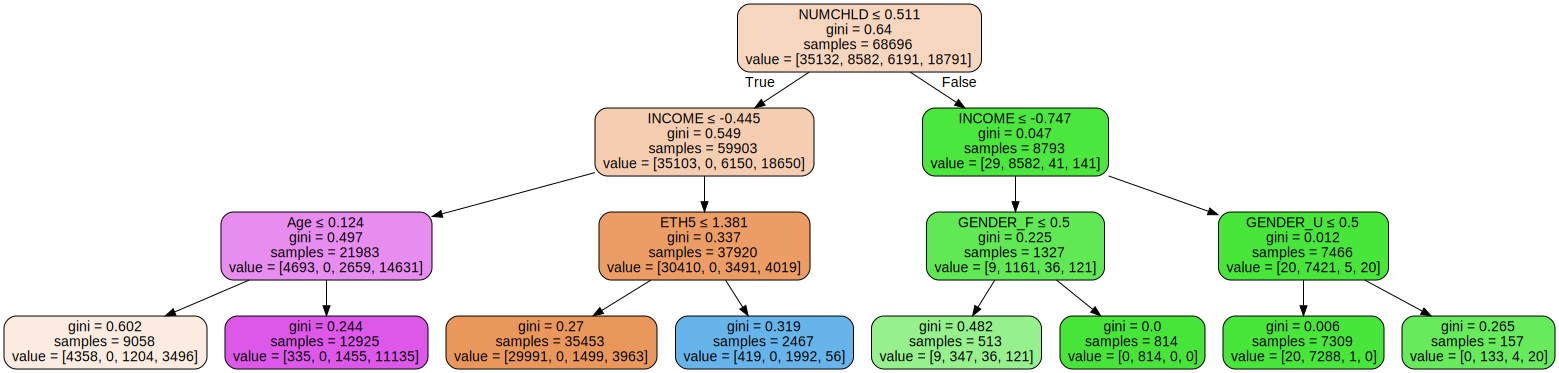

In [74]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)